<a href="https://colab.research.google.com/github/PhiloAmgad/CVD-19-Diagnosis-using-ML/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import numpy as np
import nibabel as nib
import cv2 as cv
from sklearn import feature_selection
import scipy as sp
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import svm
from PIL import Image
import matplotlib as mpl
import imageio
import matplotlib.pyplot as plt

from IPython.display import display

from skimage.feature import hog
from skimage.color import rgb2grey
from skimage.io import imread

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

data_path = 'C:\Philo\GUC\Semester 8'
filename = os.path.join(data_path, r'C:\Philo\GUC\Semester 8\tr_im.nii\tr_im.nii')
img = nib.load(filename)
data = img.get_fdata()
print(data)


FileNotFoundError: ignored

In [ ]:
#transformations for matplot lib
mask_data = nib.load(r'C:\Philo\GUC\Semester 8\tr_mask.nii\tr_mask.nii').get_fdata()
func_data = nib.load(r'C:\Philo\GUC\Semester 8\tr_im.nii\tr_im.nii').get_fdata()
lung_mask_data = nib.load(r'C:\Philo\GUC\Semester 8\tr_lungmasks_updated.nii\tr_lungmasks_updated.nii').get_fdata()
# lung_mask_data_mod = lung_mask_data
# for z in range(len(lung_mask_data_mod)):
#     for y in range(len(lung_mask_data_mod[z])):
#         for x in range(len(lung_mask_data_mod[z][y])):
#             if lung_mask_data_mod[z][y][x] ==1:
#                 lung_mask_data_mod[z][y][x] =2
print(lung_mask_data)
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Unique values of Lung Mask are : [0. 1. 2.]
Unique values of  Mask are : [0. 1.]
Select value is : 0.0


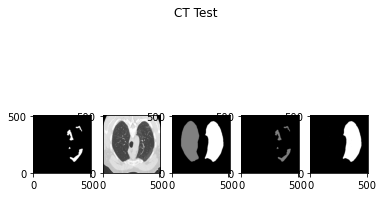

In [ ]:
lung_mask_data_unmod = nib.load(r'C:\Philo\GUC\Semester 8\tr_lungmasks_updated.nii\tr_lungmasks_updated.nii').get_fdata()
MaskSlice = mask_data[:, :, 33]
dataSlice = func_data[:, :, 33]
lungMaskSlice = lung_mask_data[:, :, 33]
#X32 = dataSlice[288:320,288:320]
mdSlice= cv.bitwise_and(MaskSlice,dataSlice)
ldSlice = cv.bitwise_and(lungMaskSlice,dataSlice)
show_slices([MaskSlice, dataSlice, lungMaskSlice,mdSlice,ldSlice])

#show_slices([lungMaskSlice,MaskSlice,X32])
plt.suptitle("CT Test") 
lungSliceArray = np.array(lungMaskSlice)
mdSliceArray = np.array(mdSlice)
maskSliceArray = np.array(MaskSlice)
dataSliceArray = np.array(dataSlice)
dataSliceArrayII = dataSliceArray.astype(np.uint8).copy()
maskSliceArrayII = maskSliceArray.astype(np.uint8).copy()
#pltimg = plt.imread('testPatch.jpg')
# opencvimg = cv.imread('testPatchII.png')
# cv.imshow('Open CV',opencvimg)
# cv.waitKey(0)
# cv.destroyAllWindows()  
#plt.imshow(pltimg)
print(f'Unique values of Lung Mask are : {np.unique(lungSliceArray)}')
print(f'Unique values of  Mask are : {np.unique(maskSliceArray)}')
print(f'Select value is : {maskSliceArray[400][270]}')
#mpl.image.imsave('testPatchII.jpg', X32)
#imageio.imwrite('testPatchII.png', X32)

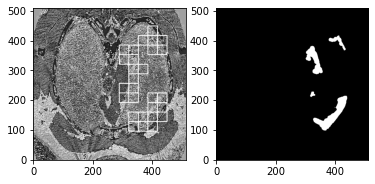

In [ ]:
# test for identifying infected 32x32 patche to create dataset 1
def checkForWhite(arr):
    for i in len(arr):
        if arr[i]>0:
            return True
        
    return False   

def checkForWhitePatch(x,y,imgArr):
    x*=32
    y*=32
    for i in range(x,x+32):
        for j in range(y,y+32):
            if imgArr[i][j]>0:
                return True   
    return False       

#function to run 32 by 32 with a contains function, 16 patches per row

i =0
detectedArr = []
for i in range(16):
   # if(checkForWhite(np.unique(array_2[i]))):
        for j in range(16):
            if(checkForWhitePatch(i,j,maskSliceArray)):
                #cv.rectangle(array_2,(i*32,j*32),(((i*32)+32,(j*32)+32)),(255,255,255),thickness=2)
                detectedArr.append((i,j))
#show_slices([slice_0, slice_1, slice_2])  
for c in range(len(detectedArr)) :
    cv.rectangle(dataSliceArrayII,(detectedArr[c][1]*32,detectedArr[c][0]*32),(((detectedArr[c][1]*32)+32,(detectedArr[c][0]*32)+32)),(255,255,255),thickness=2)

cv.imshow("highlight",dataSliceArrayII)
cv.waitKey(0)
cv.destroyAllWindows()  
image2  = Image.fromarray(np.uint8(dataSliceArrayII * 255) , 'L')
image2.show()
affine = np.eye(4)
nifti_file = nib.Nifti1Image(dataSliceArrayII, affine).get_fdata()
show_slices([nifti_file, mask_data[:,:,33]])



In [ ]:
# #create dataset 1
# #print(len(func_data[1][1]))
# # if 1 on lungMask and 1 on infected n=mask then infected , if 1 on lung mask
# # and 0 on infected mask then non infected.
# #else discarded
# mask_data = nib.load(r'C:\Philo\GUC\Semester 8\tr_mask.nii\tr_mask.nii').get_fdata()
# func_data = nib.load(r'C:\Philo\GUC\Semester 8\tr_im.nii\tr_im.nii').get_fdata()
# lung_mask_data = nib.load(r'C:\Philo\GUC\Semester 8\tr_lungmasks_updated.nii\tr_lungmasks_updated.nii').get_fdata()
# for ctscan in range(74,100):
#     currentCT = func_data[:,:,ctscan]
#     currentMask = mask_data[:,:,ctscan]
#     currentLungMask = lung_mask_data[:,:,ctscan]
#     # CTInfected = cv.bitwise_and(currentCT,currentMask)
#     # CTNonInfected =  cv.bitwise_and(currentCT,currentLungMask)
#     detectedInfectedArr = []
#     detectedNonInfectedArr = []
#     i=0
#     j=0
#     for i in range(16):
#         for j in range(16):
#             if(checkForWhitePatch(i,j,currentMask)):
#                 detectedInfectedArr.append((i,j))
#             else:
#                 if checkForWhitePatch(i, j, currentLungMask ):
#                     detectedNonInfectedArr.append((i,j))
#     c=0
#     d=0                
#     for c in range(len(detectedInfectedArr)) : 
#         #10010_
#         imgID = 10000+ctscan
#         patchIDSub=  10000+c
#         patchID =str(imgID)+'_'+str(patchIDSub)
#         currentPatch = currentCT[detectedInfectedArr[c][1]*32:(detectedInfectedArr[c][1]*32)+32,detectedInfectedArr[c][0]*32:(detectedInfectedArr[c][0]*32)+32]
#         imageio.imwrite(f'\Philo\GUC\Semester 8\VSCode Python Workspace\Replicate\Infected32x32\{patchID}.png',currentPatch )              
#     for d in range(len(detectedNonInfectedArr)) : 
#         #10010_
#         imgIDII = 10000+ctscan
#         patchIDSubII=  10000+d
#         patchIDII =str(imgIDII)+'_'+str(patchIDSubII)
#         currentPatchII = currentCT[detectedNonInfectedArr[d][1]*32:(detectedNonInfectedArr[d][1]*32)+32,detectedNonInfectedArr[d][0]*32:(detectedNonInfectedArr[d][0]*32)+32]
#         imageio.imwrite(f'\Philo\GUC\Semester 8\VSCode Python Workspace\Replicate\Healthy32x32\{patchIDII}.png',currentPatchII)              
    
        

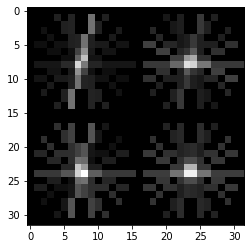

In [ ]:
#Histogram of oriented gradients
patch = '10033_10002'
infected = Image.open(f'\Philo\GUC\Semester 8\VSCode Python Workspace\Replicate\Healthy32x32\{patch}.png')
hog_features, hog_image = hog(infected,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

plt.imshow(hog_image, cmap=mpl.cm.gray)

In [ ]:
bombus_row = func_data[:,:,78]
bombus = np.array(bombus_row)
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to greyscale
    #grey_image = rgb2grey(img)
    # get HOG features from greyscale image
    hog_features = hog(img, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack(color_features)
    return flat_features

bombus_features = create_features(bombus)

print(bombus_features)

[ -940.18532562  -941.27214813  -957.27259064 ... -1348.
 -1348.         -1348.        ]


In [ ]:
Categories=['Healthy32x32','Infected32x32']
def create_feature_matrix(label_dataframe):
    features_list = []
    for i in Categories:
        path=os.path.join(f'\Philo\GUC\Semester 8\VSCode Python Workspace\Replicate',i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            imgNPArr=np.array(img_array)
            image_features = create_features(imgNPArr)
            features_list.append(image_features)
    feature_matrix = np.array(features_list)
    return feature_matrix        
    


# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(Categories)

In [ ]:
# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
ct_stand = ss.fit_transform(feature_matrix)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
ct_pca = ss.fit_transform(ct_stand)
# look at new shape
print('PCA matrix shape is: ', ct_pca.shape)

Feature matrix shape is:  (10249, 1024)
PCA matrix shape is:  (10249, 1024)


In [ ]:
# 5458 healthy
# 4791 infected
res = np.empty(10249, dtype = str)#tuple maybe
for i in range(0,5458):
    res[i]='Healthy32x32'
for i in range(5458,10249) :
    res[i]= 'Infected32x32'

In [ ]:
X = pd.DataFrame(ct_pca)
y = pd.Series(res)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3,
                                                    random_state=1234123)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

H    3756
I    3418
dtype: int64

In [ ]:
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.5482926829268293


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


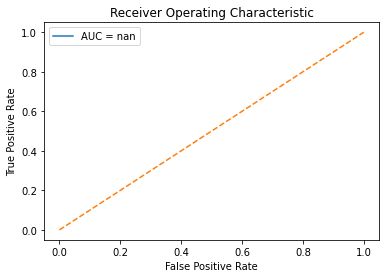

In [ ]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
Categories=['Healthy32x32','Infected32x32']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/Philo/GUC/Semester 8/VSCode Python Workspace/Replicate' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        flat_data_arr.append(img_array.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : Healthy32x32
loaded category:Healthy32x32 successfully
loading... category : Infected32x32
loaded category:Infected32x32 successfully


In [ ]:
print('babdd')

In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully


KeyboardInterrupt: 

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

In [ ]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');